In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

Upload dataset to df Dataframe object

In [ ]:
df = pd.read_csv('/content/disease_class.csv')

Display 5 first rows of df and get familiar with columns and their meanings. (Sex 1 male - 0 female, disease 1 - diagnosed with disease, 0 - not diagnosed with disease)

In [ ]:
print(df.head(5))


   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


Display shape of df

In [19]:
df.shape

(270, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


Split df into features dataframe X and target/class dataframe y. 
The target class is in column 'heart disease'

In [20]:
y = df['heart disease']
X = df[['age', 'sex', 'BP', 'cholestrol']]

Use train_test_split function to split X and y dataframes into train and test sets (*X_train, X_test, y_train, y_test*). Set train_size to 0.6 and random_state to 42. Print shapes of X_train and X_test

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size = 0.6, random_state=42)
print("X_train_shape:", X_train.shape)
print("X_test_shape:", X_test.shape)

X_train_shape: (162, 4)
X_test_shape: (108, 4)


Initialize DecisionTreeClassifier and assign it to dt variable. Set random_state to 42, criterion to "entropy" and max_depth to 3.

In [ ]:
dt = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 3)

Build a decision tree classifier from the training set (X_train, y_train). Use fit method

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Display your decision tree plot using code below

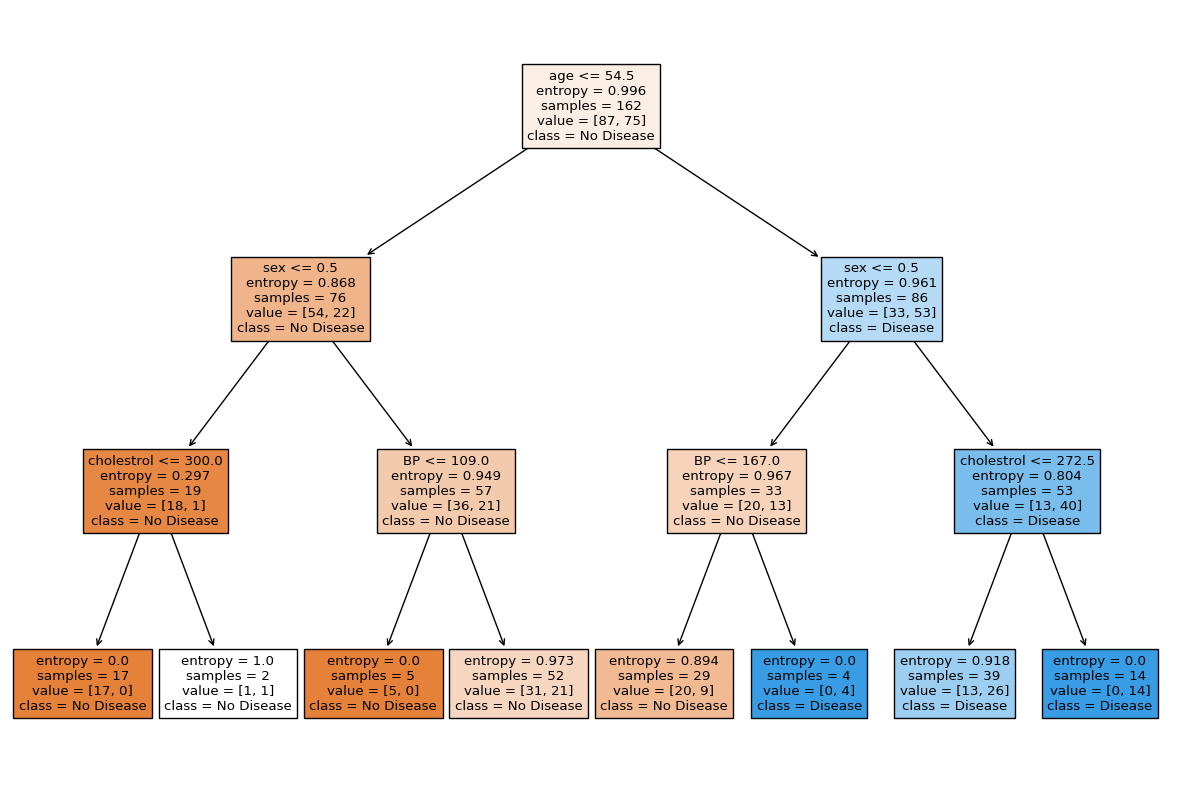

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)

Calculate confusion matrixes for train and test datasets using *confusion_matrix* function. Print the results.:

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
confusion_train = confusion_matrix(y_train, y_train_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix for the training set:\n',confusion_train)
print('Confusion matrix for the test set:\n',confusion_test)

Confusion matrix for the training set:
 [[74 13]
 [31 44]]
Confusion matrix for the test set:
 [[48 15]
 [23 22]]


Manually calculate the accuracies for train and test sets above using confusion matrix results and formula from Cross Validation lecture. Give equation below in a comment

In [ ]:
accuracy_train = (confusion_train[0, 0] + confusion_train[1, 1]) / np.sum(confusion_train)
accuracy_test = (confusion_test[0, 0] + confusion_test[1, 1]) / np.sum(confusion_test)
print('Accuracy for the training set:', accuracy_train)
print('Accuracy for the test set:', accuracy_test)

Accuracy for the training set: 0.7283950617283951
Accuracy for the test set: 0.6481481481481481


In [23]:
train_tp = confusion_train[1, 1]
train_tn = confusion_train[0, 0]
train_fp = confusion_train[0, 1]
train_fn = confusion_train[1, 0]

test_tp = confusion_test[1, 1]
test_tn = confusion_test[0, 0]
test_fp = confusion_test[0, 1]
test_fn = confusion_test[1, 0]

train_acc = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
test_acc = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.7283950617283951
Test Accuracy: 0.6481481481481481


The formula for calculating accuracy using the confusion matrix is:

Accuracy
=
Number of correct predictions/Total number of predictions = TP+TN/TP+TN+FP+FN
where TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives, and FN is the number of false negatives.


Calculate accuracies for train and test datasets using accuracy_score function. Compare results to yours from above.



In [24]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.7283950617283951
Test Accuracy: 0.6481481481481481


**Hyper-parameter tuning**

The goal of below code is to choose best DT hyper-parameters from below set (params)

In [25]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100]
}

Use GridSearchCV to find best combination of max_depth and min_samples_leaf parameters providing best **accuracy** in test set.


> Initialize GridSearchCV instance, to estimator assign your decision tree instance, to param_grid - params dictionary, verbose=1, n_jobs=-1. 


> Check what should be assigned to cv argument if we want to determine 4-Fold Cross Validation strategy. Set scoring to proper metric.



> Assign GridSearchCV object to grid_search variable








In [26]:
# Instantiate the grid search model
# grid_search = GridSearchCV(...

grid_search = GridSearchCV(estimator=dt, param_grid=params, verbose=1, n_jobs=-1, cv=4, scoring='accuracy')

Run grid_search fit

In [27]:
%%time

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
CPU times: user 224 ms, sys: 63.6 ms, total: 288 ms
Wall time: 5.78 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

Create pandas dataframe from *grid_search.cv_results_*
Assign the result df to score_df and print 5 first rows. See what are the output columns and their values

In [33]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008410,0.004044,0.005729,0.003826,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.658537,0.658537,0.550,0.725,0.648018,0.062760,6
1,0.004163,0.000216,0.003152,0.000608,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.658537,0.658537,0.550,0.725,0.648018,0.062760,6
2,0.004678,0.000634,0.003639,0.001460,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.658537,0.682927,0.700,0.725,0.691616,0.024262,1
3,0.004392,0.000597,0.002822,0.000075,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.658537,0.609756,0.575,0.700,0.635823,0.047470,10
4,0.004606,0.000802,0.002840,0.000272,2,100,"{'max_depth': 2, 'min_samples_leaf': 100}",0.536585,0.536585,0.525,0.550,0.537043,0.008851,21


Assign to dt_best variable *grid_search.best_estimator_*

In [30]:
dt_best = grid_search.best_estimator_

Calculate confusion matrixes and accuracies for train and test datasets

In [31]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Confusion matrix for train dataset:\n', train_confusion_matrix)
print('Accuracy for train dataset:', train_acc)
print('Confusion matrix for test dataset:\n', test_confusion_matrix)
print('Accuracy for test dataset:', test_acc)

Confusion matrix for train dataset:
 [[74 13]
 [35 40]]
Accuracy for train dataset: 0.7037037037037037
Confusion matrix for test dataset:
 [[49 14]
 [23 22]]
Accuracy for test dataset: 0.6574074074074074
